### ***Import All Required Libraries***  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### ***Load Train and Test Data***  

In [13]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

### ***Ordinal Features***  

In [14]:
# Training ORDINAL values -- from data dictionary
ordinal_train = train_df[['Id', 'Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 
          'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
          'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual',
          'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'SalePrice'
         ]]
ordinal_train.head(1)

,Id,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,...,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,SalePrice
0,109,IR1,AllPub,Gtl,6,8,Gd,TA,TA,TA,...,Gd,Typ,NaN,RFn,TA,TA,Y,NaN,NaN,130500


In [15]:
# Testing ORDINAL values -- from data dictionary
ordinal_test = test_df[['Id', 'Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 
          'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2',
          'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual',
          'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 
         ]]
ordinal_test.head(1)

,Id,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,...,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence
0,2658,Reg,AllPub,Gtl,6,8,TA,Fa,Fa,TA,...,FuseP,Fa,Typ,NaN,Unf,Po,Po,Y,NaN,NaN


### ***Mapping Ordinal Columns With Numeric Values***  

In [16]:
# Need to map the ordinal features with number
# Credit to Haley Taft
ordinal_columns = {'Lot Shape' : {'IR3' : 1, 'IR2' : 2, 'IR1' : 3, 'Reg' : 4}, 
                   'Utilities': {'ELO' : 0, 'NoSeWa' : 1, 'NoSewr' : 2, 'AllPub' : 3}, 
                   'Land Slope': {'Sev' : 1, 'Mod' : 2, 'Gtl' : 3}, 
                   'Exter Qual': {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
                   'Exter Cond': {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
                   'Bsmt Qual' : {np.nan : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},   # not sure about this one 
                   'Bsmt Cond' : {np.nan : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},    # or this one
                   'Bsmt Exposure' : {np.nan : 0, 'No' : 1, 'Mn' : 2, 'Av' : 3, 'Gd' : 4}, 
                   'BsmtFin Type 1' : {np.nan : 0, 'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6},
                   'BsmtFin Type 2' : {np.nan : 0, 'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6},
                   'Heating QC' : {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}, 
                   'Electrical' : {np.nan : 0, 'Mix' : 1, 'FuseP' : 2, 'FuseF' : 3, 'FuseA' : 4, 'SBrkr' : 5},
                   'Kitchen Qual' : {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
                   'Functional' : {'Sal' : 1, 'Sev' : 2, 'Maj2' : 3, 'Maj1' : 4, 'Mod': 5, 'Min2' : 6, 'Min1' : 7, 'Typ' : 8}, 
                   'Fireplace Qu' : {np.nan : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
                   'Garage Finish' : {np.nan : 0, 'Unf' : 1, 'RFn' : 2, 'Fin' : 3},
                   'Garage Qual' : {np.nan : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
                   'Garage Cond' : {np.nan : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
                   'Paved Drive' : {'N' : 1, 'P' : 2, 'Y' : 3},
                   'Pool QC' : {np.nan : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4},
                   'Fence' : {np.nan : 0, 'MnWw' : 1, 'GdWo' : 2, 'MnPrv' : 3, 'GdPrv' : 4} }

In [17]:
ordinal_train.replace(ordinal_columns, inplace = True)
ordinal_test.replace(ordinal_columns, inplace = True)

/Users/aidancurley/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


### ***Ordinal Feature Correlation with Sale Price***  

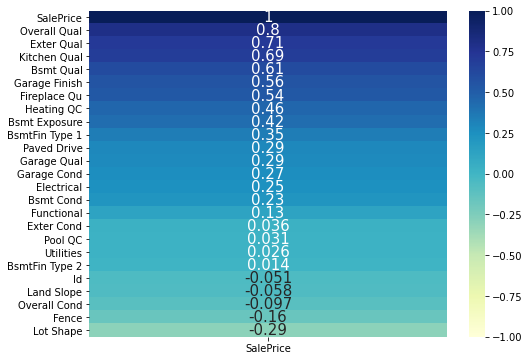

In [18]:
# I only want features with more than 60% correlationb
# 'Overall Qual', 'Exter Qual', 'Kitchen Qual', 'Bsmt Qual' 
plt.figure(figsize=(8,6))
sns.heatmap(ordinal_train.corr()[['SalePrice']].sort_values(by="SalePrice",
       ascending=False),
           annot=True,
           cmap='YlGnBu',
           annot_kws={'fontsize':15},
           vmin=-1, vmax=1, );

### ***Checking For Multicollinearity***  

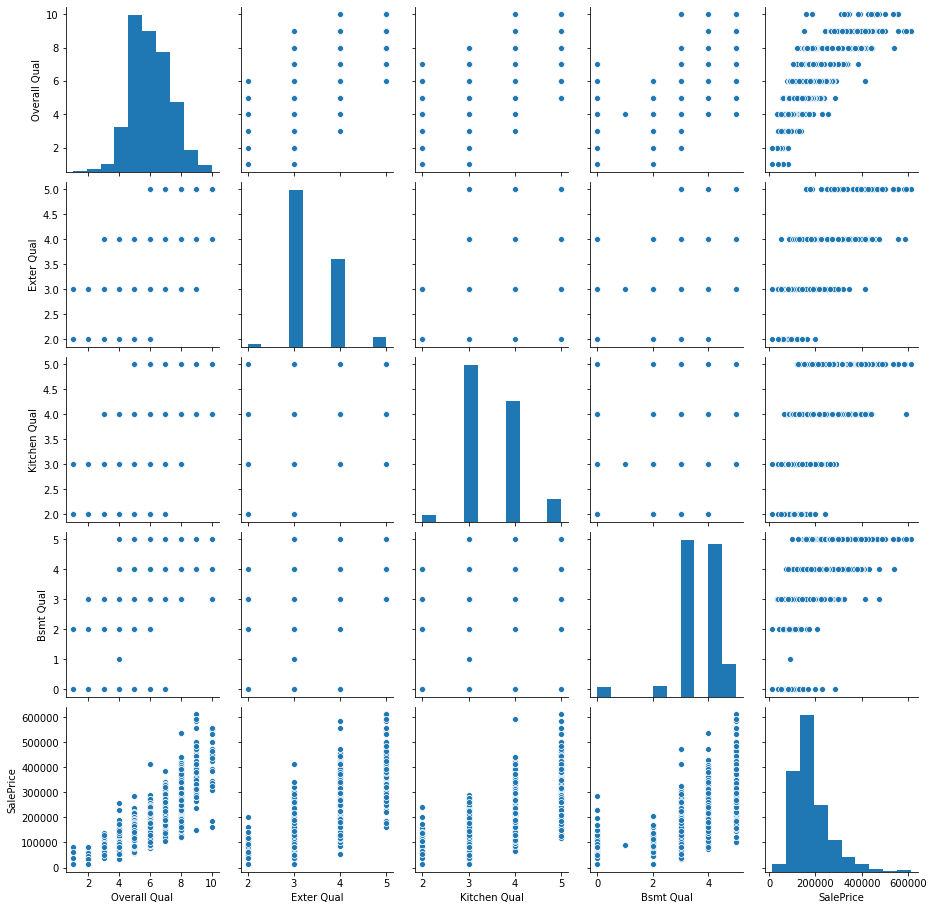

In [19]:
# No multicollinearity amongst features with a correlation of .60 or greater with 'SalePrice'
# These features will be important for determing if we should buy a house or not in that area.
# Also when we go to sell the house we need to make sure these qualities are high.
sns.pairplot(ordinal_train[['Overall Qual', 'Exter Qual', 'Kitchen Qual', 'Bsmt Qual', 'SalePrice']]);

### ***Feature Reasoning***    
- These are all of the features that I believe to be important for when we **SELL** the investment property. 
- In the scatter plots above we can see that as the quality increases we the price generally increases.
- It would be a good idea to locate the houses with overall quality of 8 or greater and see what qualifies them for that overall quality score. So, when we are fixing up our houses we can shoot for the same or better quality. This would be a great benchmark to reach to aim for a higher sale price for our property.

In [20]:
# Nothing is out of the ordinary such as outliers
ordinal_train[['Overall Qual', 'Exter Qual', 'Kitchen Qual', 'Bsmt Qual']].describe()

,Overall Qual,Exter Qual,Kitchen Qual,Bsmt Qual
count,2051.000000,2051.000000,2051.000000,2051.000000
mean,6.112140,3.406143,3.517309,3.490005
std,1.426271,0.587962,0.665577,0.901637
min,1.000000,2.000000,2.000000,0.000000
25%,5.000000,3.000000,3.000000,3.000000
50%,6.000000,3.000000,3.000000,4.000000
75%,7.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000


In [21]:
# Function that gives me all of the features with .60 correlation or greater with 'SalePrice'
def over_fifty(train, test):
    
    # This gets me all of the features with a correlation of over .60
    corr_over_fifty_cols = train.columns[train.corr()['SalePrice'] > .60] # Credit to Eric Heidbreder
    
    # Training correlation over .60
    final_df_train = train[corr_over_fifty_cols[:-1]]
    final_df_train = final_df_train.join(train['Id'])
    
    # Reorder the columns so 'Id' is first
    cols = list(final_df_train.columns)
    cols = [cols[-1]] + cols[:-1]
    final_df_train = final_df_train[cols]

    # Testing correlation over .60
    final_df_test = test[corr_over_fifty_cols[:-1]]
    final_df_test = final_df_test.join(test['Id'])
    
    # Reorder the columns so 'Id' is first
    cols = list(final_df_test.columns)
    cols = [cols[-1]] + cols[:-1]
    final_df_test = final_df_test[cols]
    
    # Send out the csv to main merging function
    final_df_train.to_csv('../data/ordinal_train.csv', index=False)
    final_df_test.to_csv('../data/ordinal_test.csv', index=False)
    
#     return sns.pairplot(final_df_train)
    return final_df_train

In [22]:
over_fifty(ordinal_train, ordinal_test)

,Id,Overall Qual,Exter Qual,Bsmt Qual,Kitchen Qual
0,109,6,4,3,4
1,544,7,4,4,4
2,153,5,3,3,4
3,318,5,3,4,3
4,255,6,3,2,3
...,...,...,...,...,...
2046,1587,8,4,4,4
2047,785,4,3,3,3
2048,916,6,3,3,3
2049,639,4,3,3,3
